Tarea semanal 9

Usando filtro IIR

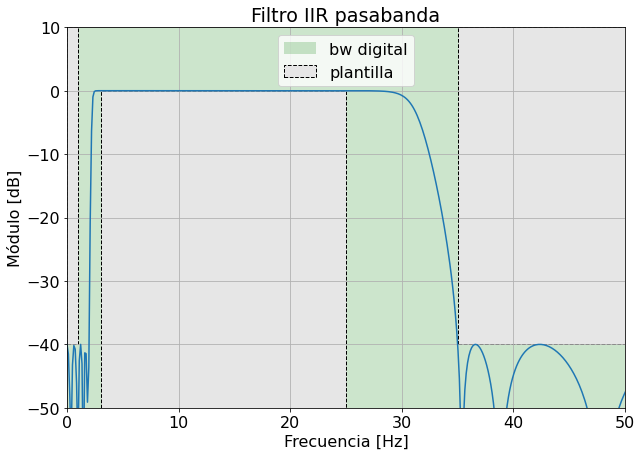

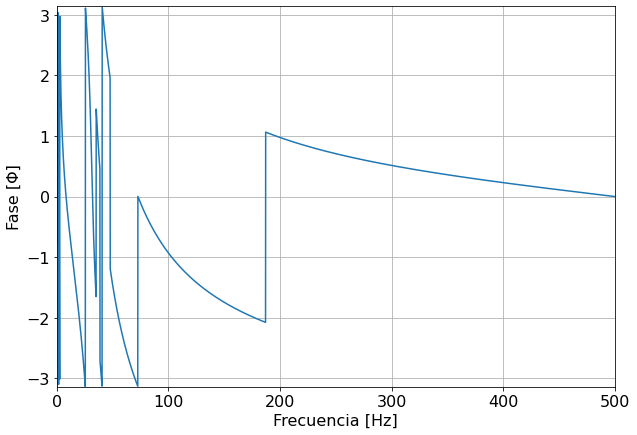

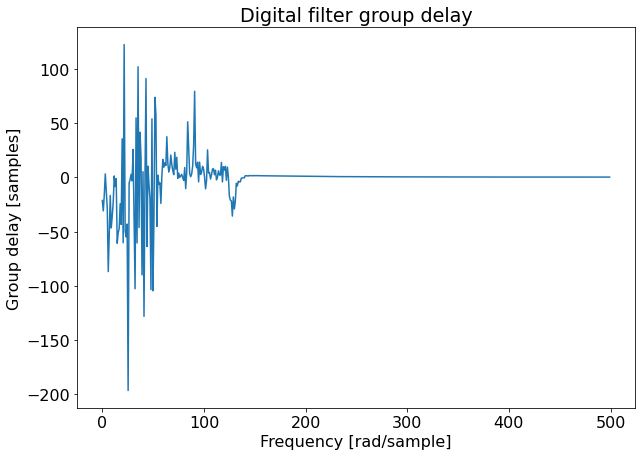

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

<Figure size 720x504 with 0 Axes>

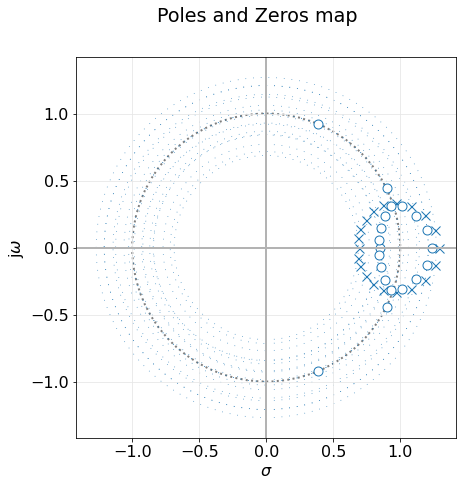

In [22]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla
from splane import pzmap

## Fig Config

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 200 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

##
# filter design
fs = 1000 # Hz
nyq_frec = fs / 2

ripp = 0 # dB
aten = 40 # dB

fs1 = 1.0 #Hz
fp1 = 3.0 #Hz
fp2 = 25.0 #Hz
fs2 = 35.0 #Hz

ws1 = 2*np.pi*fs1
wp1 = 2*np.pi*fp1
wp2 = 2*np.pi*fp2
ws2 = 2*np.pi*fs2

frecs = np.array([0.0, fs1, fp1, fp2, fs2, nyq_frec])/nyq_frec
gains = np.array([-aten, -aten, -ripp, -ripp, -aten, -aten])
gains = 10**(gains/20)      # Paso a veces (desde dB)

# Diseño el filtro IIR
orden = 10

sos_cheb = sig.iirfilter(orden, [fs1+1, fs2], rp=ripp, rs=aten, btype='band', ftype='cheby2',output='sos', fs=fs)

# transformo a Z

w_z, h_z = sig.sosfreqz(sos_cheb, worN=4096)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

# Grafico el modulo
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro IIR pasabanda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 50, -50, 10 ])

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripp , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = aten, fs = fs)


# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, np.pi ])

# Grafico retardo de grupo
plt.figure()

num_z, den_z = sig.sos2tf(sos_cheb)
w_gd, gd = sig.group_delay((num_z, den_z))

w_gd = w_gd / np.pi * nyq_frec

plt.title('Digital filter group delay')
plt.plot(w_gd, gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.show()

# Grafico polos y ceros
plt.figure()

num_z, den_z = sig.sos2tf(sos_cheb)
my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )

Ahora con un filtro FIR


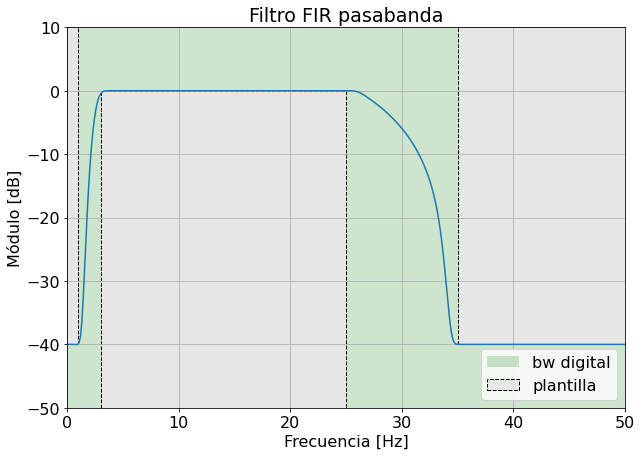

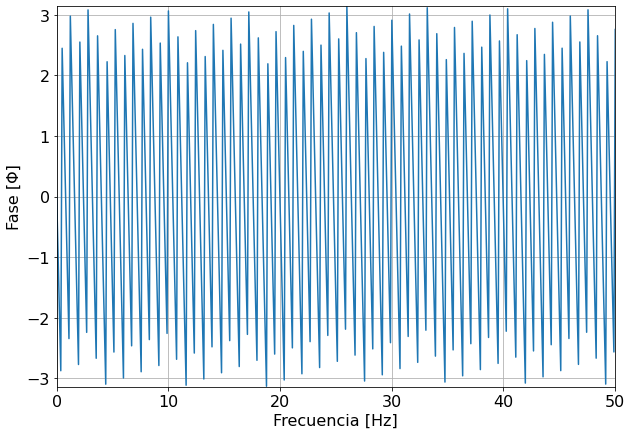

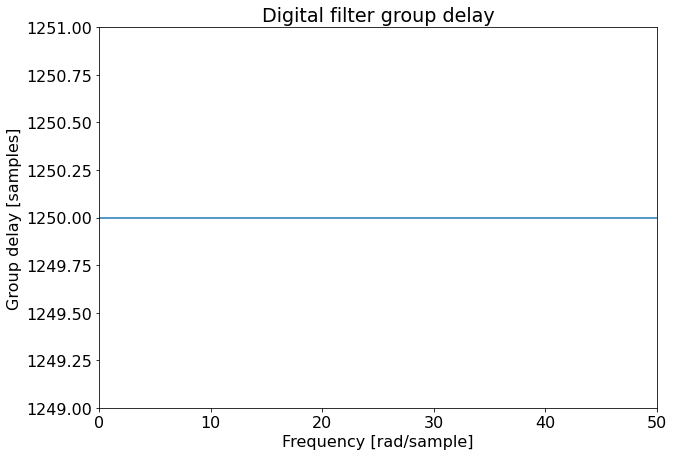

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

<Figure size 720x504 with 0 Axes>

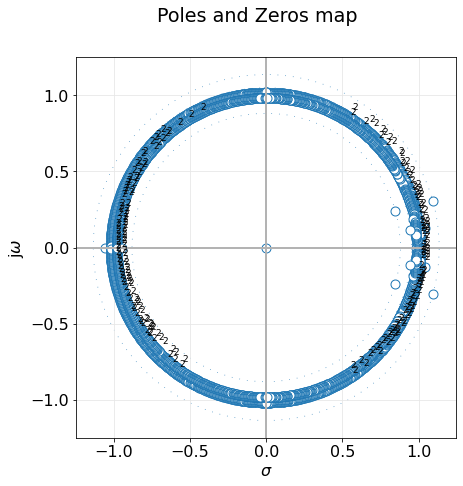

In [23]:
# filter design
fs = 1000 # Hz
nyq_frec = fs / 2

ripp = 0 # dB
aten = 40 # dB

ws1 = 2 #Hz
wp1 = 2.7 #Hz
wp2 = 26 #Hz
ws2 = 34 #Hz

# Diseño el filtro FIR

frecs = np.array([0.0, ws1, wp1, wp2, ws2, nyq_frec])/nyq_frec
gains = np.array([-aten, -aten, -ripp, -ripp, -aten, -aten])
gains = 10**(gains/20)      # Paso a veces (desde dB)

orden = 2501

num_z = sig.firwin2(orden, frecs, gains, window='blackman')
den_z = 1
# transformo a Z

w_z, h_z = sig.freqz(num_z, den_z, worN=4096)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

# Grafico el modulo
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro FIR pasabanda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 50, -50, 10 ])

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0, ws1, wp1, wp2, ws2, nyq_frec])/nyq_frec

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripp , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = aten, fs = fs)


# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, 50, -np.pi, np.pi ])

# Grafico retardo de grupo
plt.figure()

w_gd, gd = sig.group_delay((num_z, den_z), w=2048)

w_gd = w_gd / np.pi * nyq_frec

plt.title('Digital filter group delay')
plt.plot(w_gd, gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.axis([0, 50, 1249, 1251 ])
plt.show()

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )


Parte 2

In [24]:
###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)


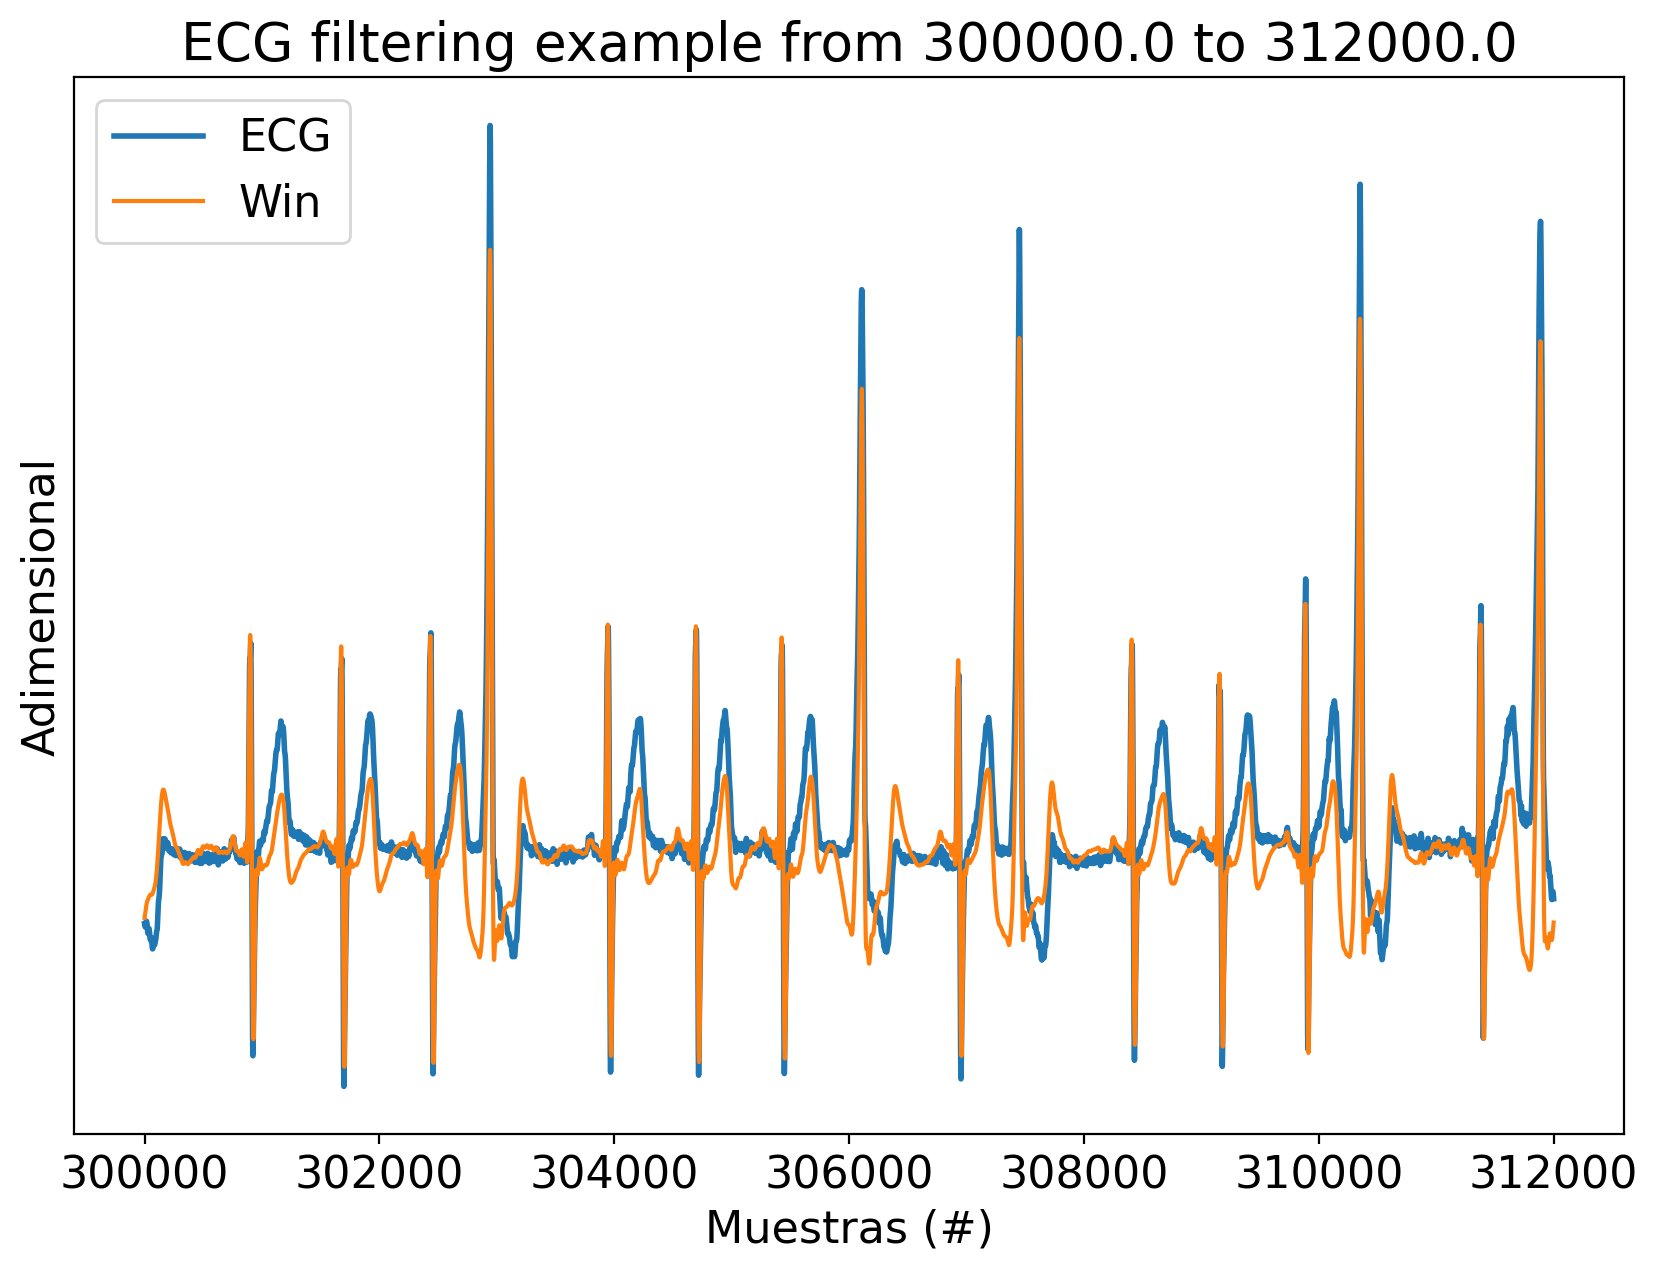

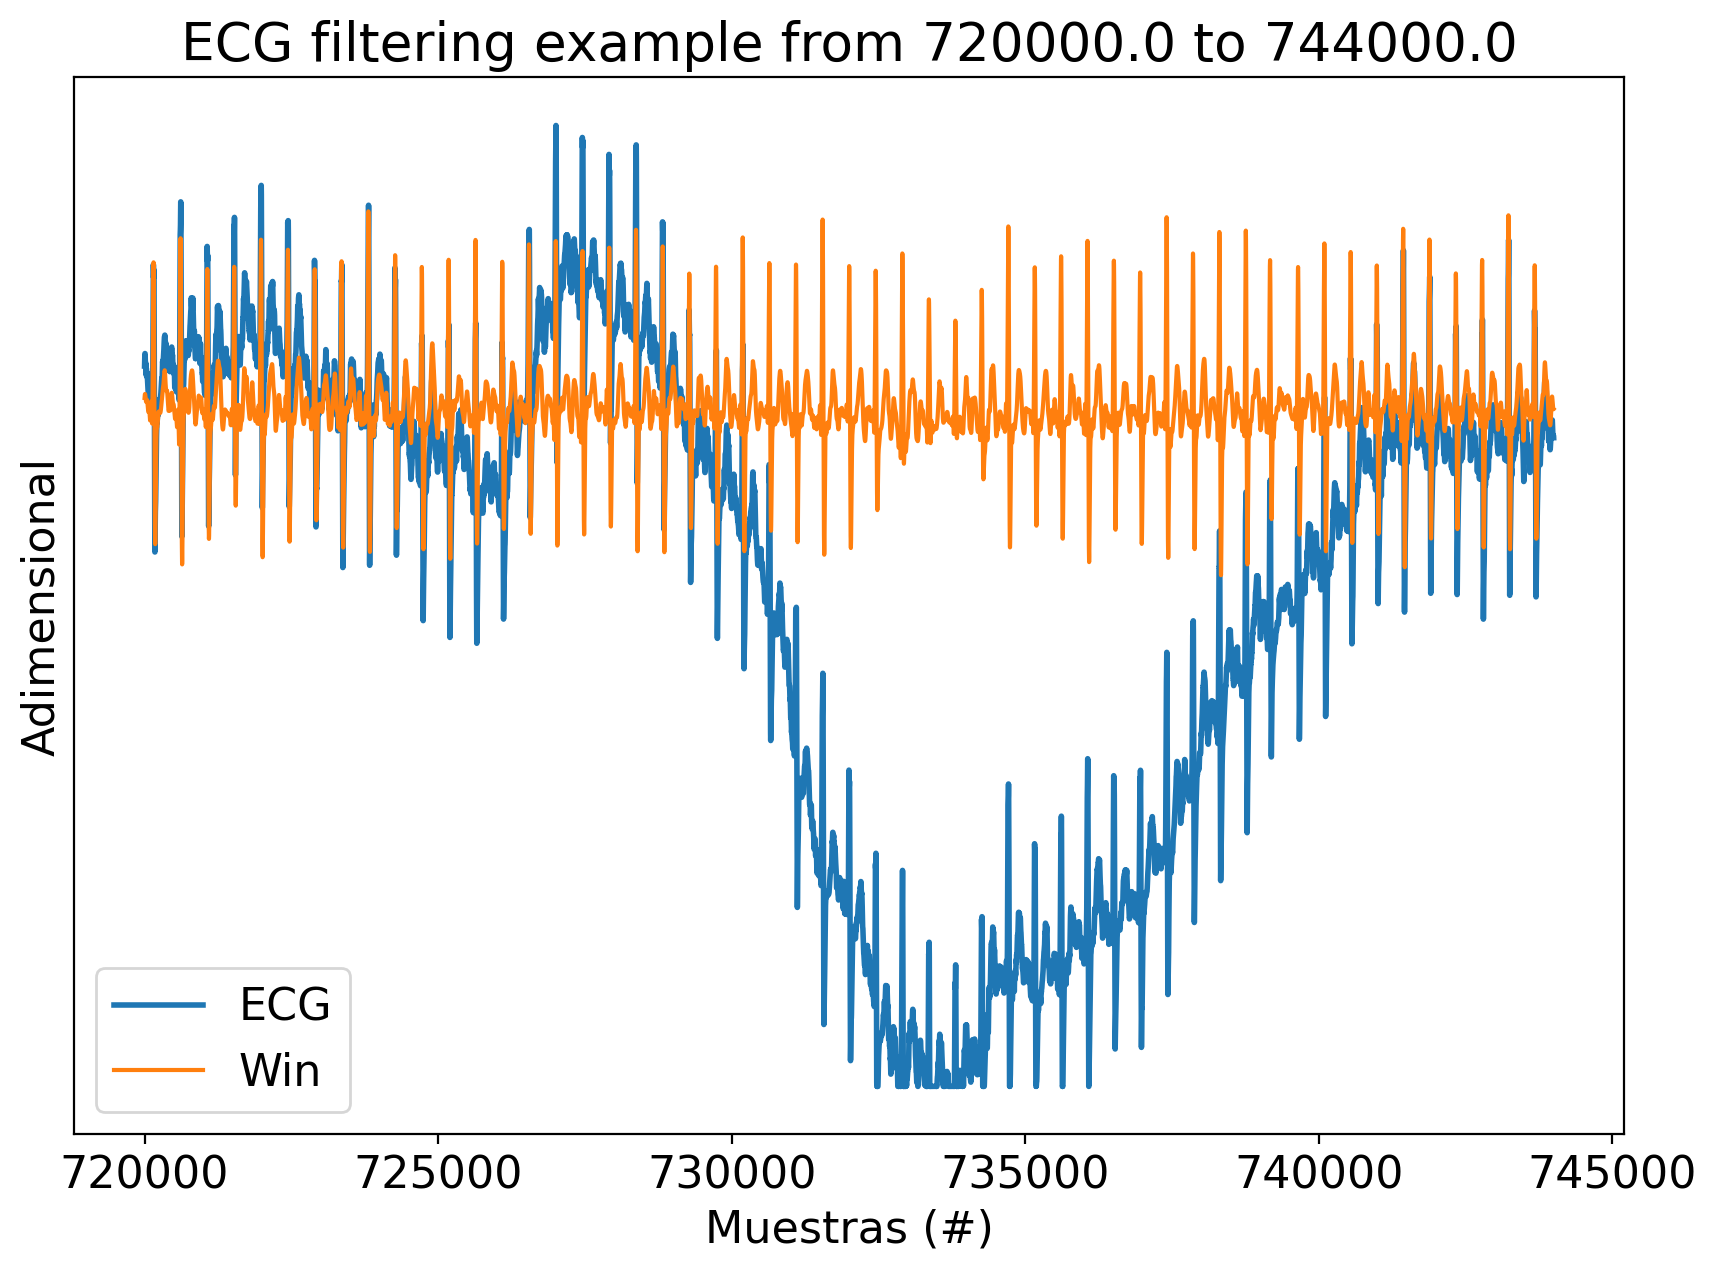

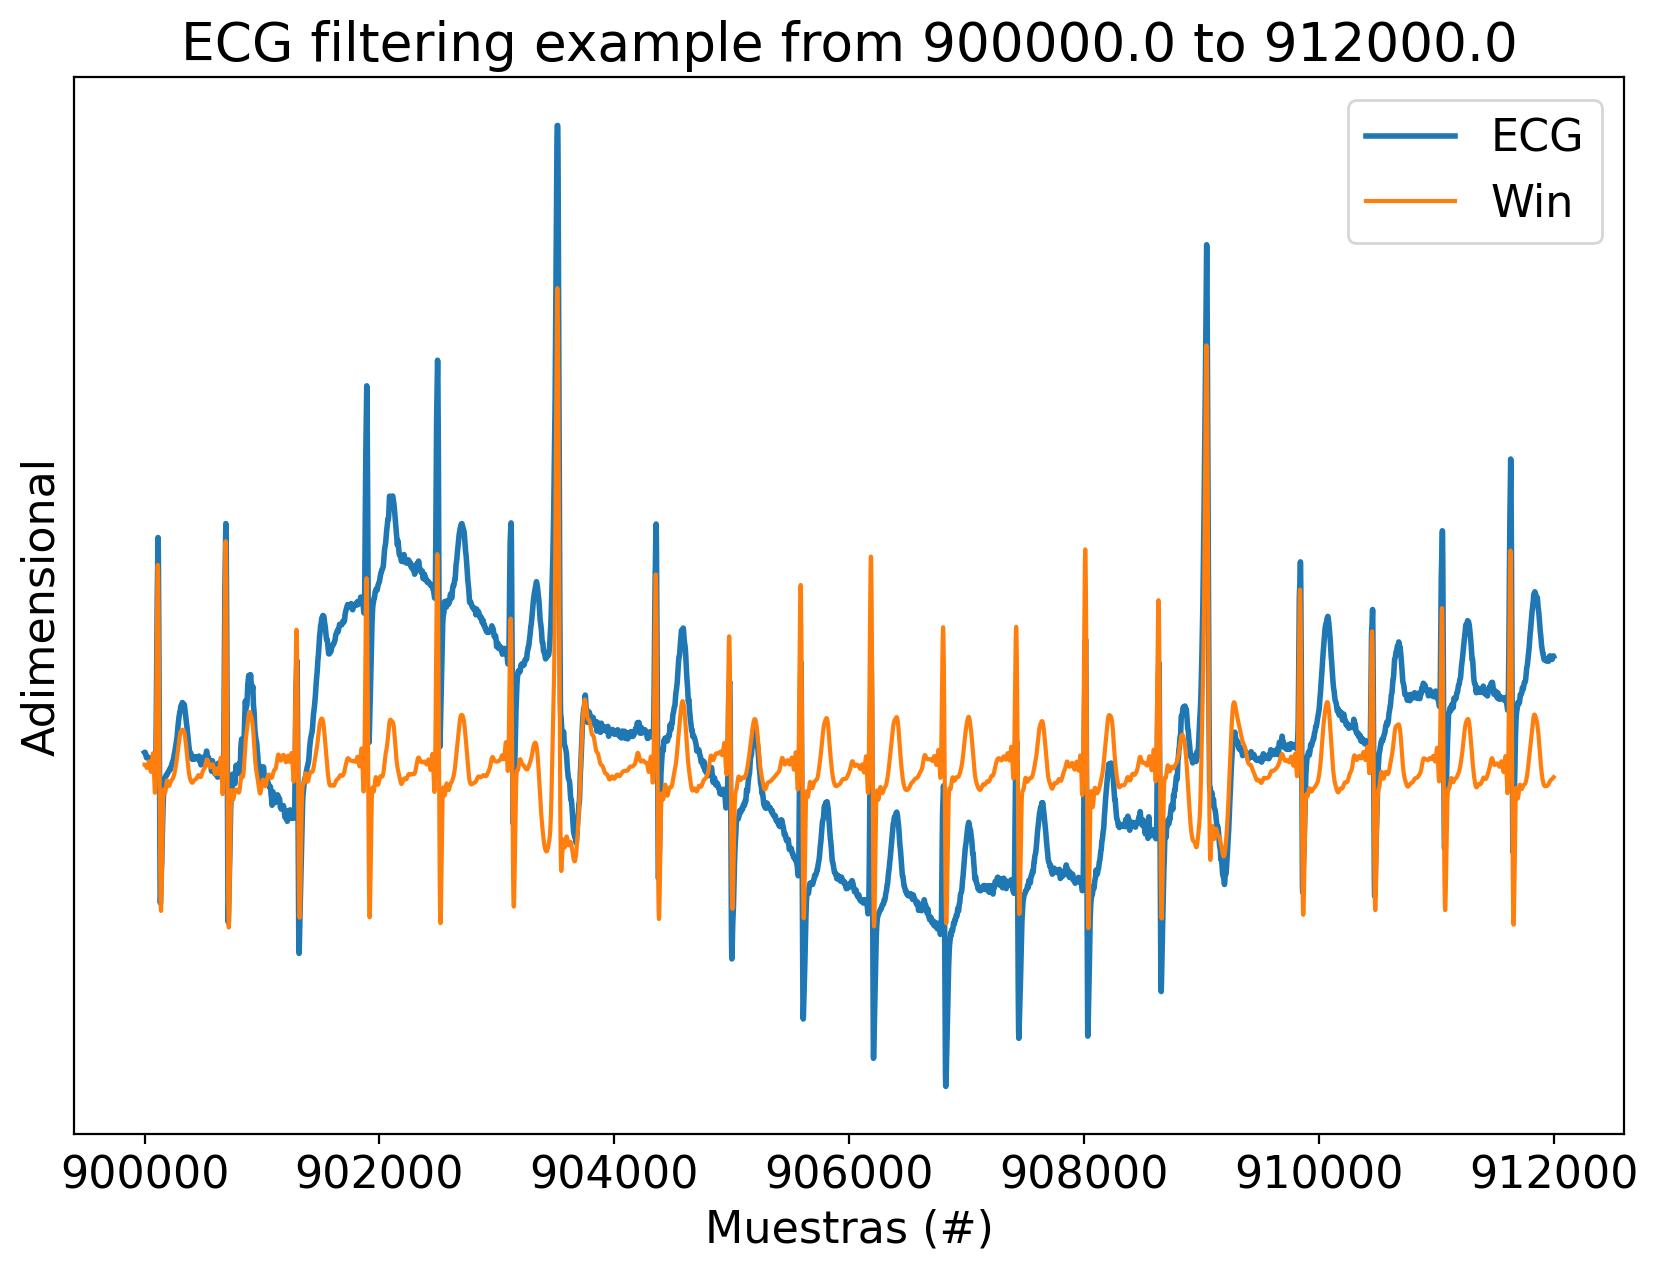

In [33]:
# FIR
ECG_f_win = sig.lfilter(num_z, den_z, ecg_one_lead)

demora = 1250


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

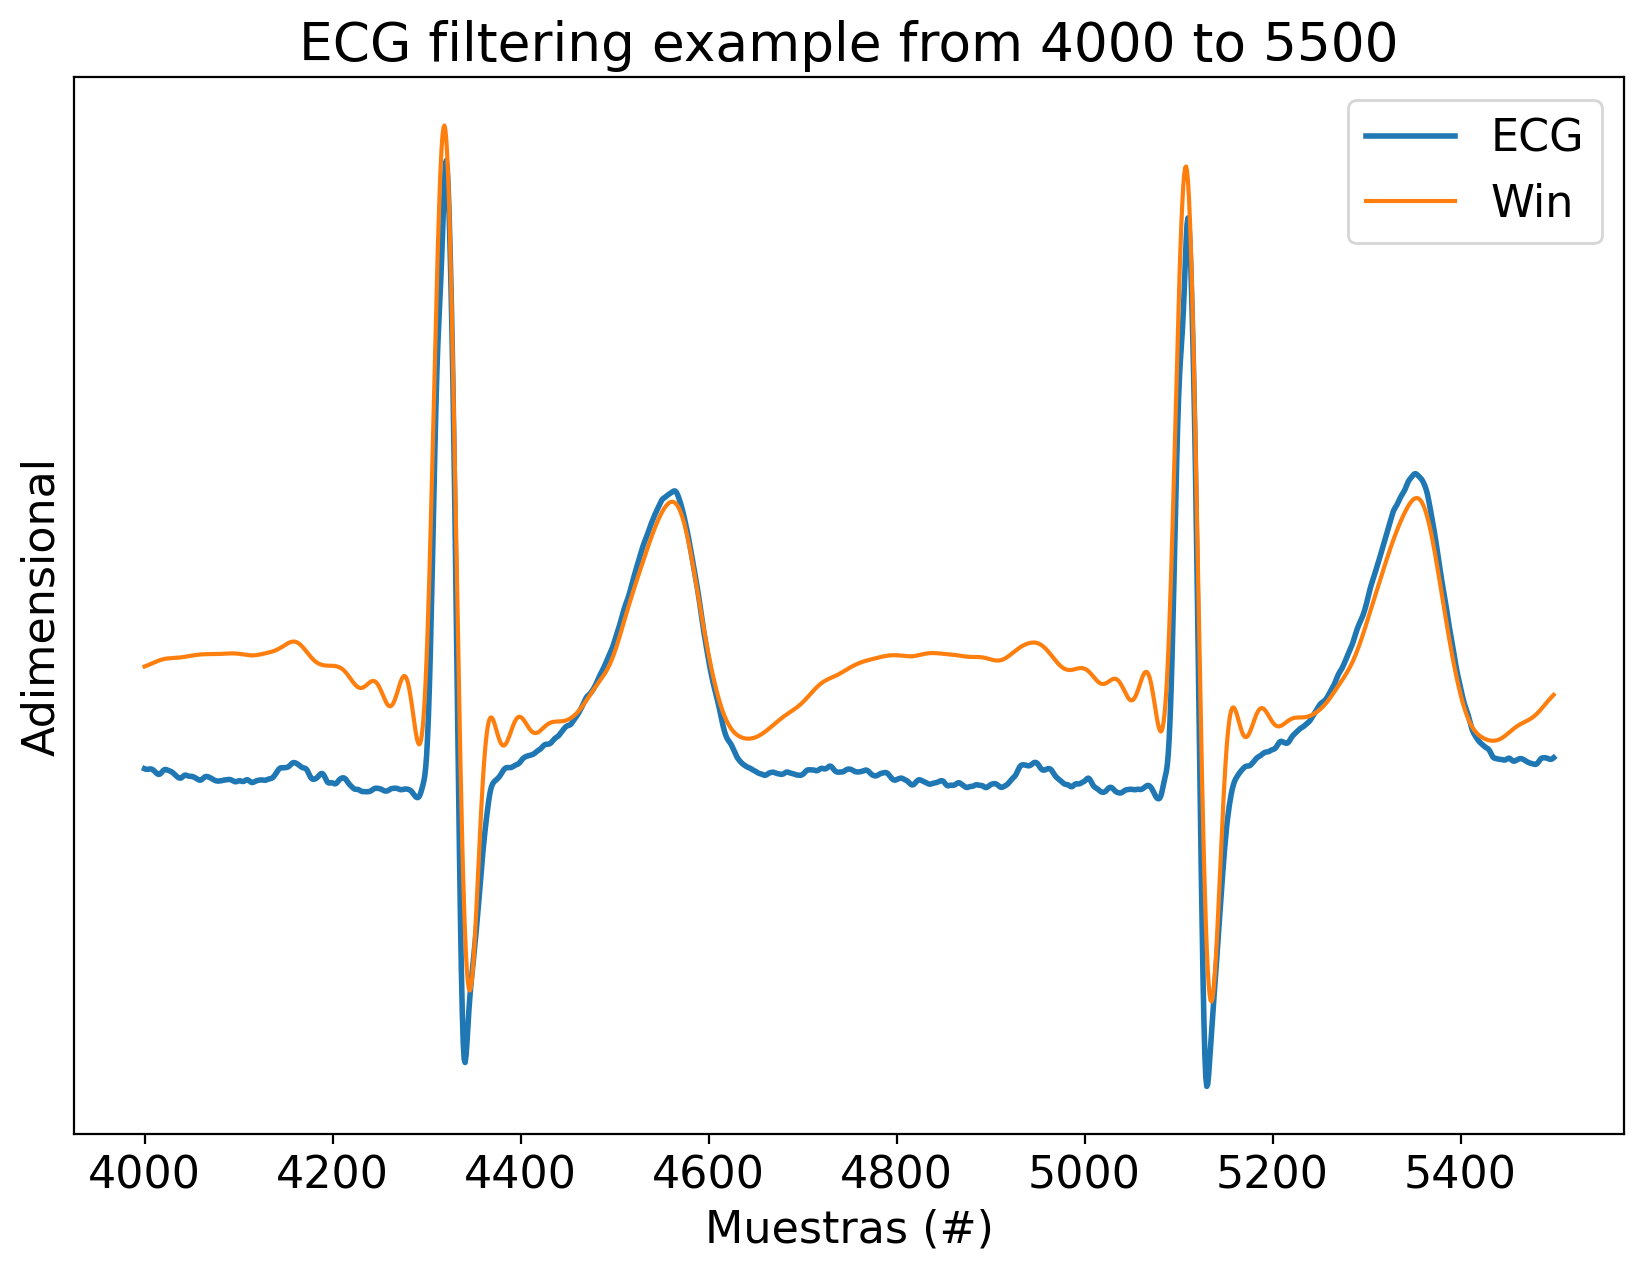

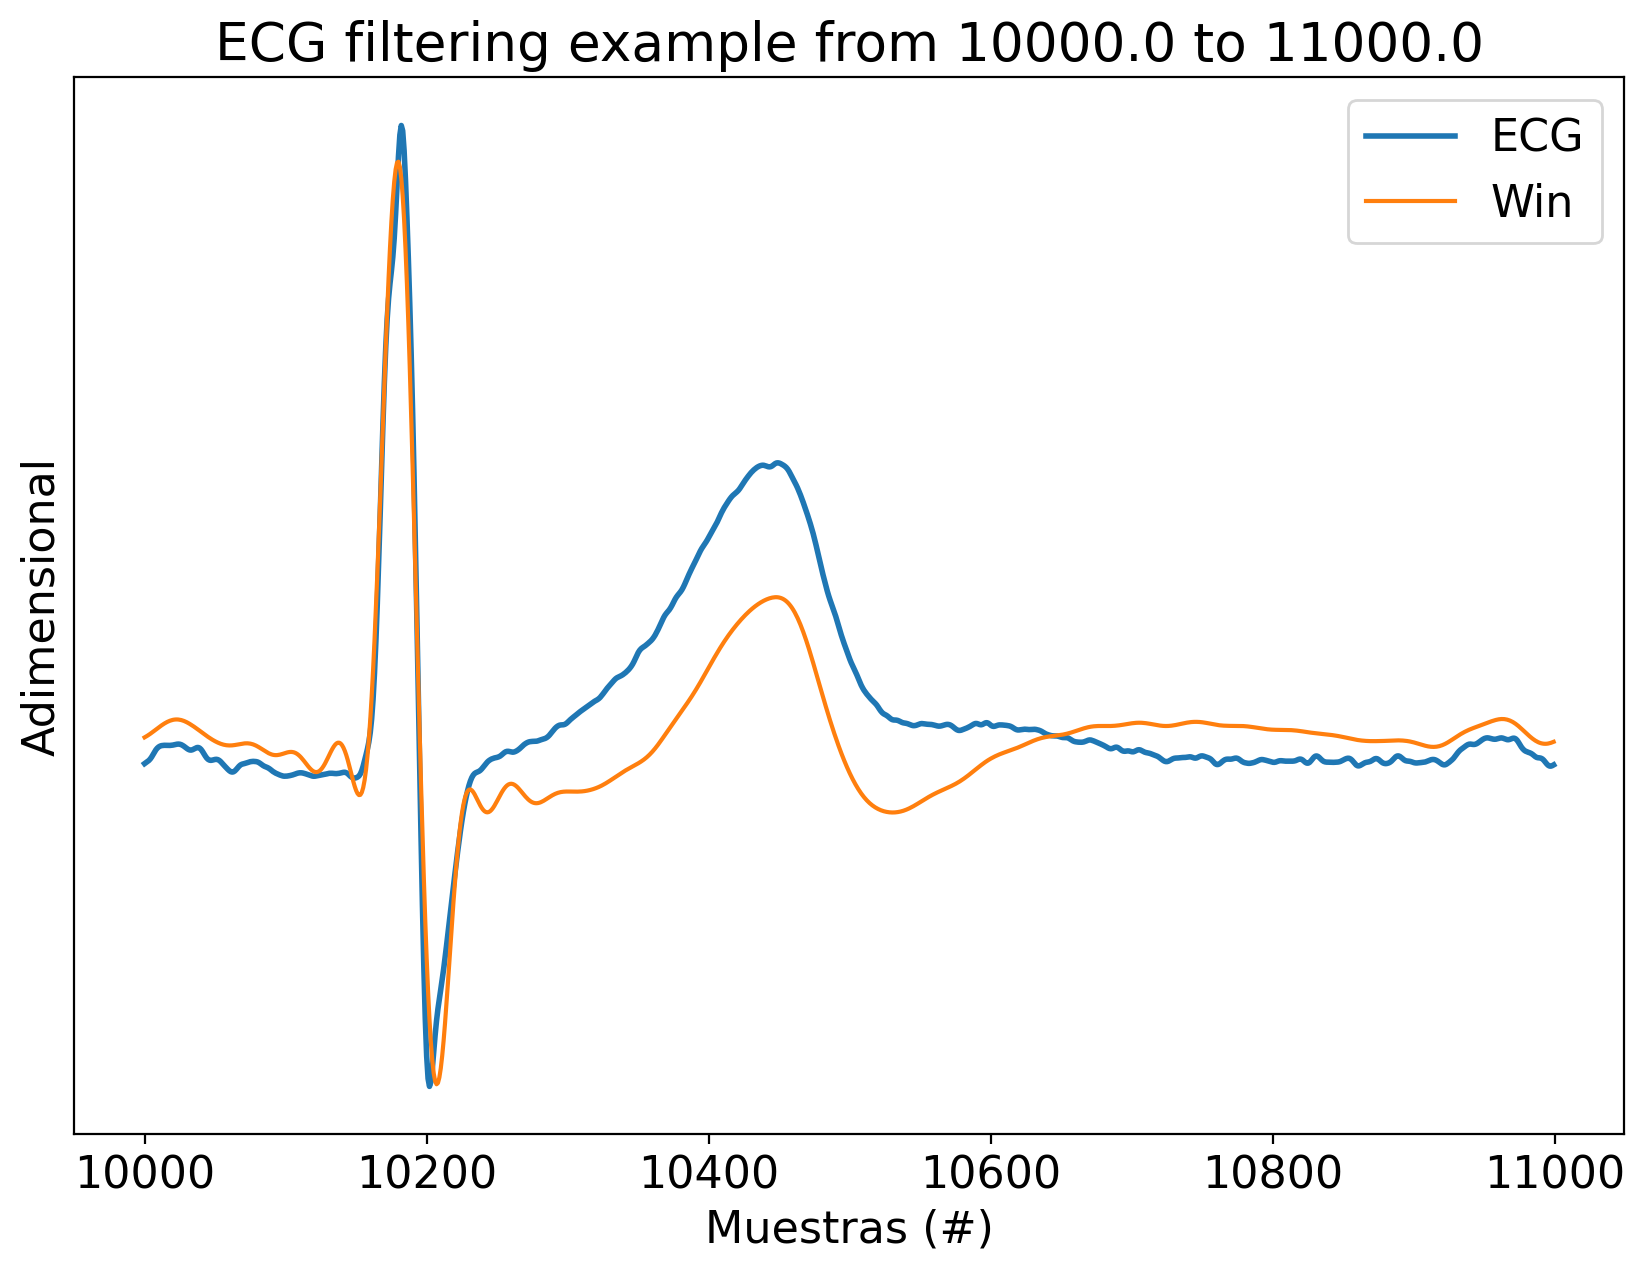

In [26]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

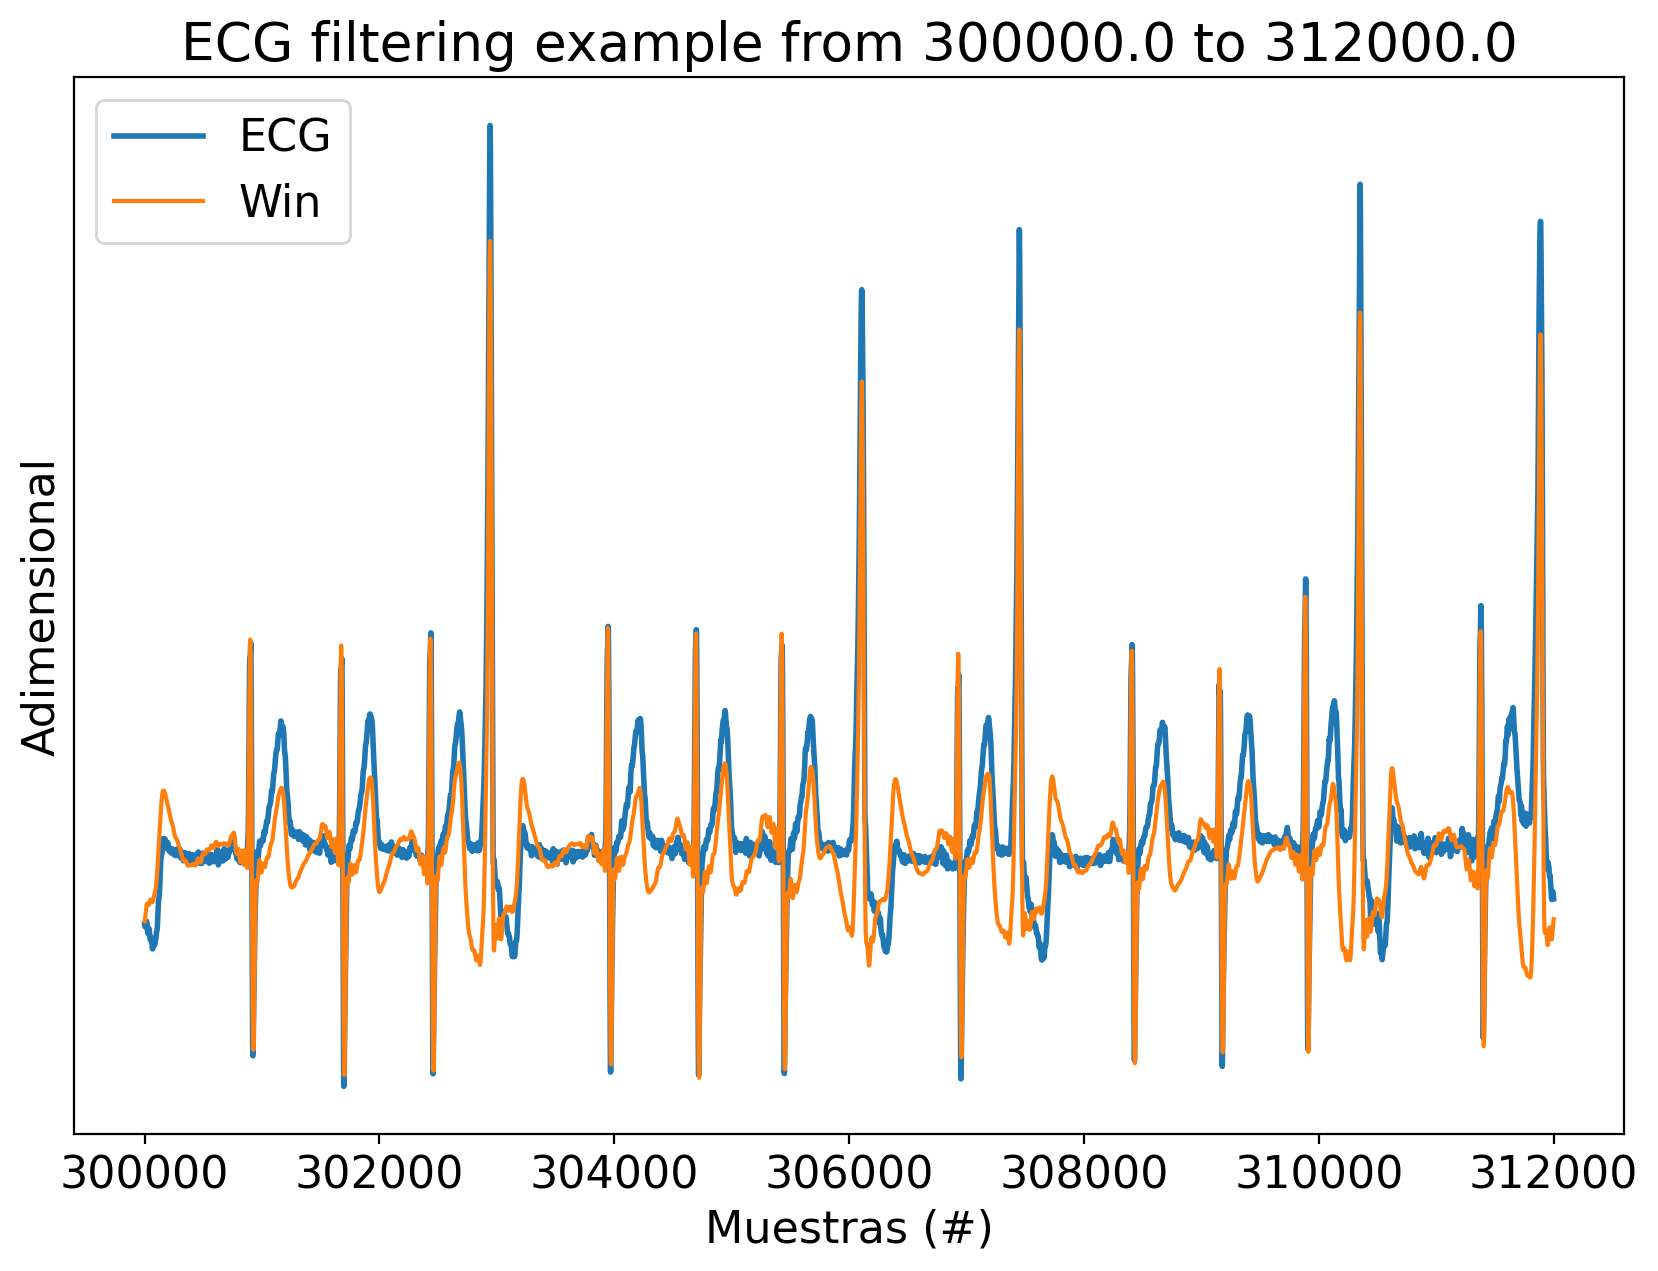

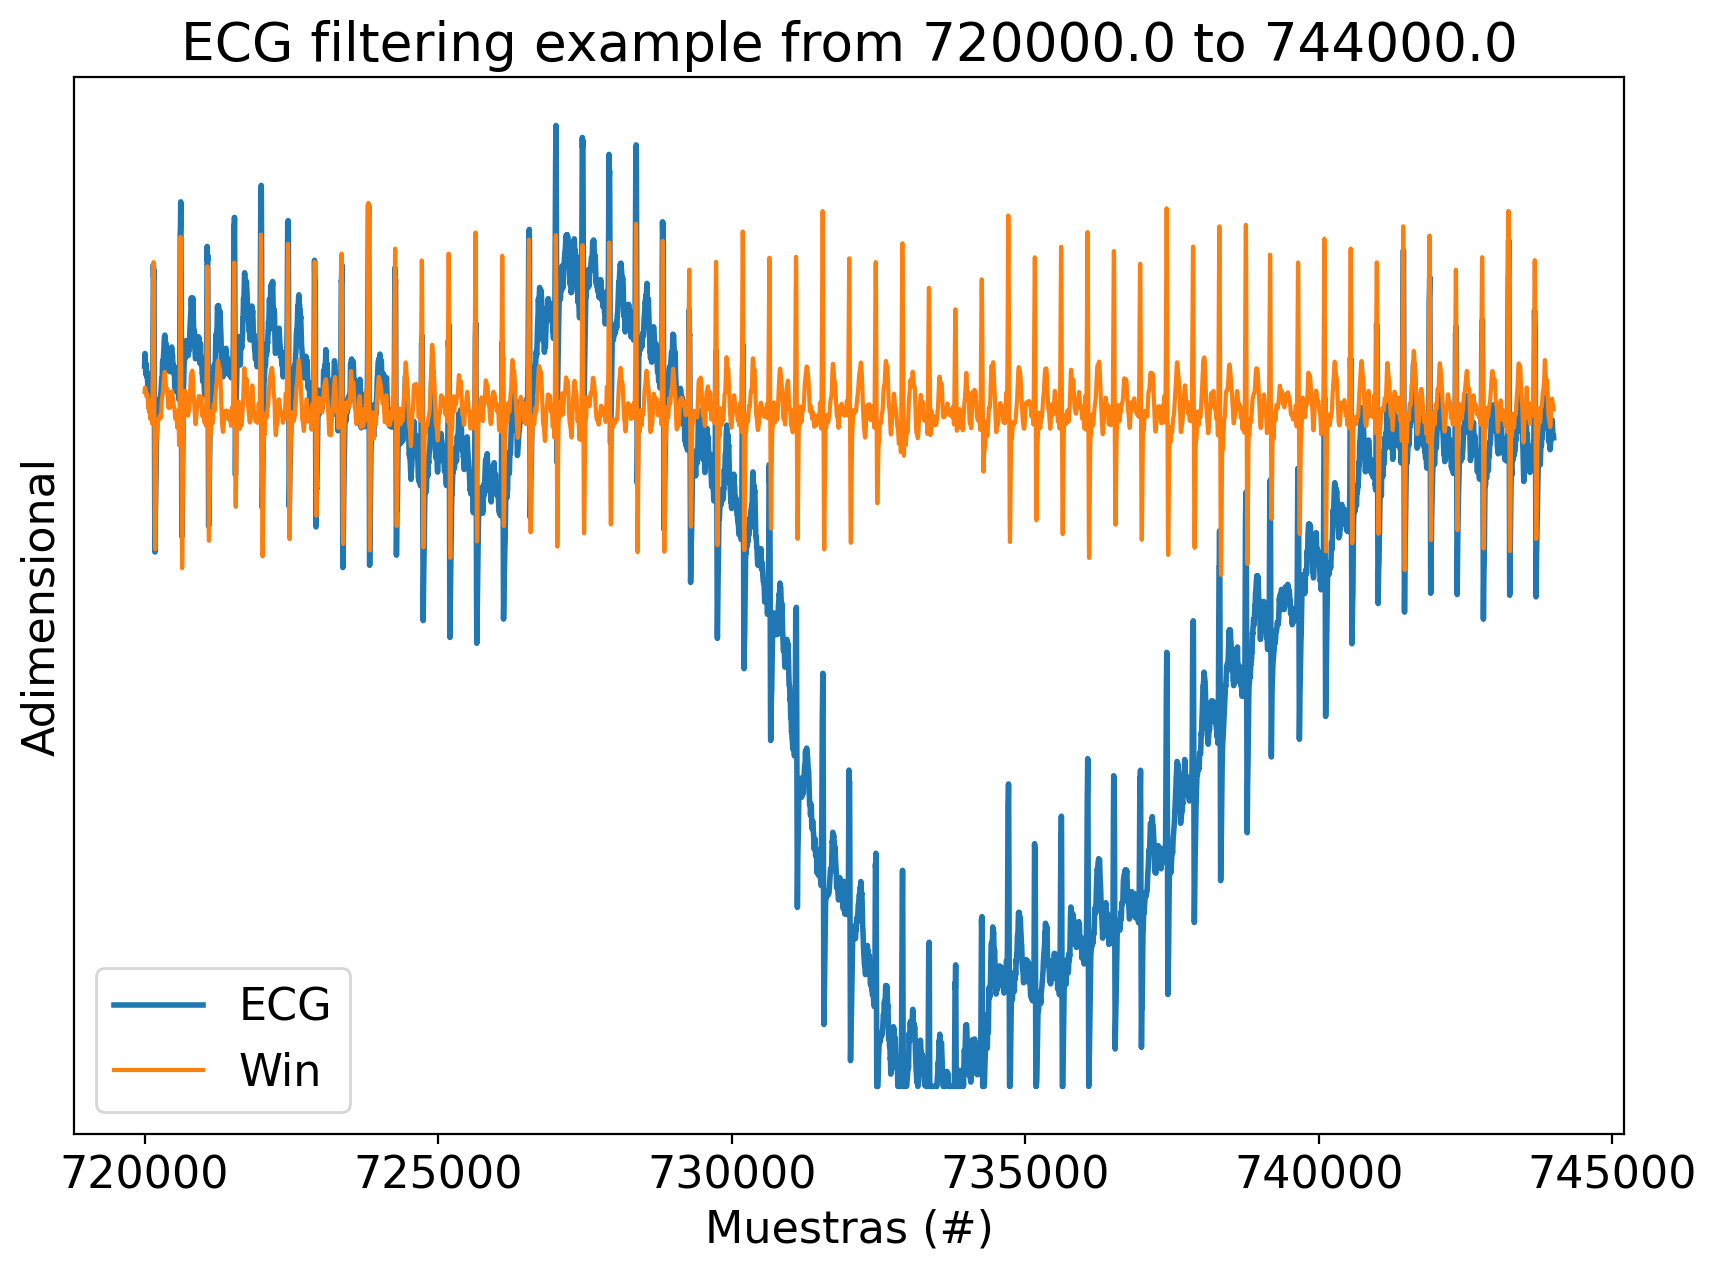

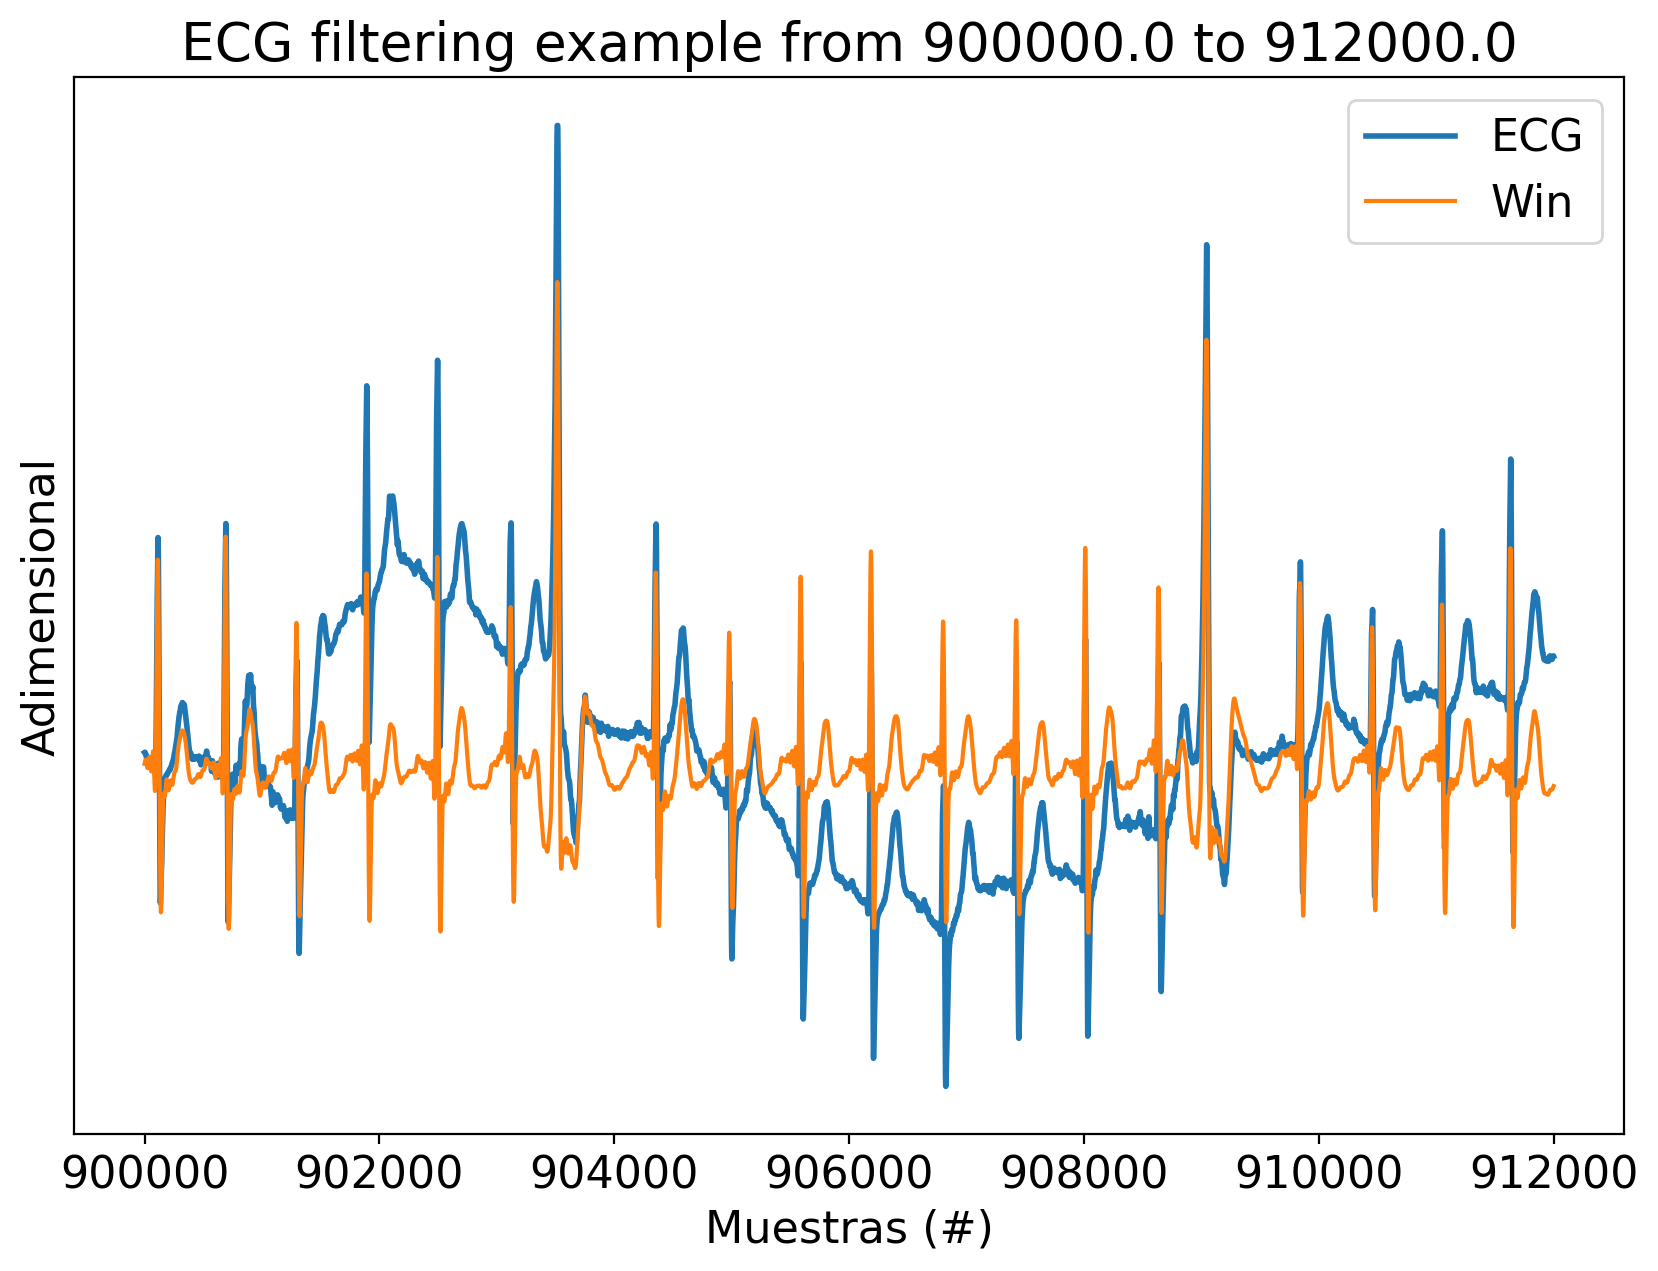

In [27]:
# IIR
ECG_f_cheb = sig.sosfiltfilt(sos_cheb, ecg_one_lead)



# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_cheb[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()


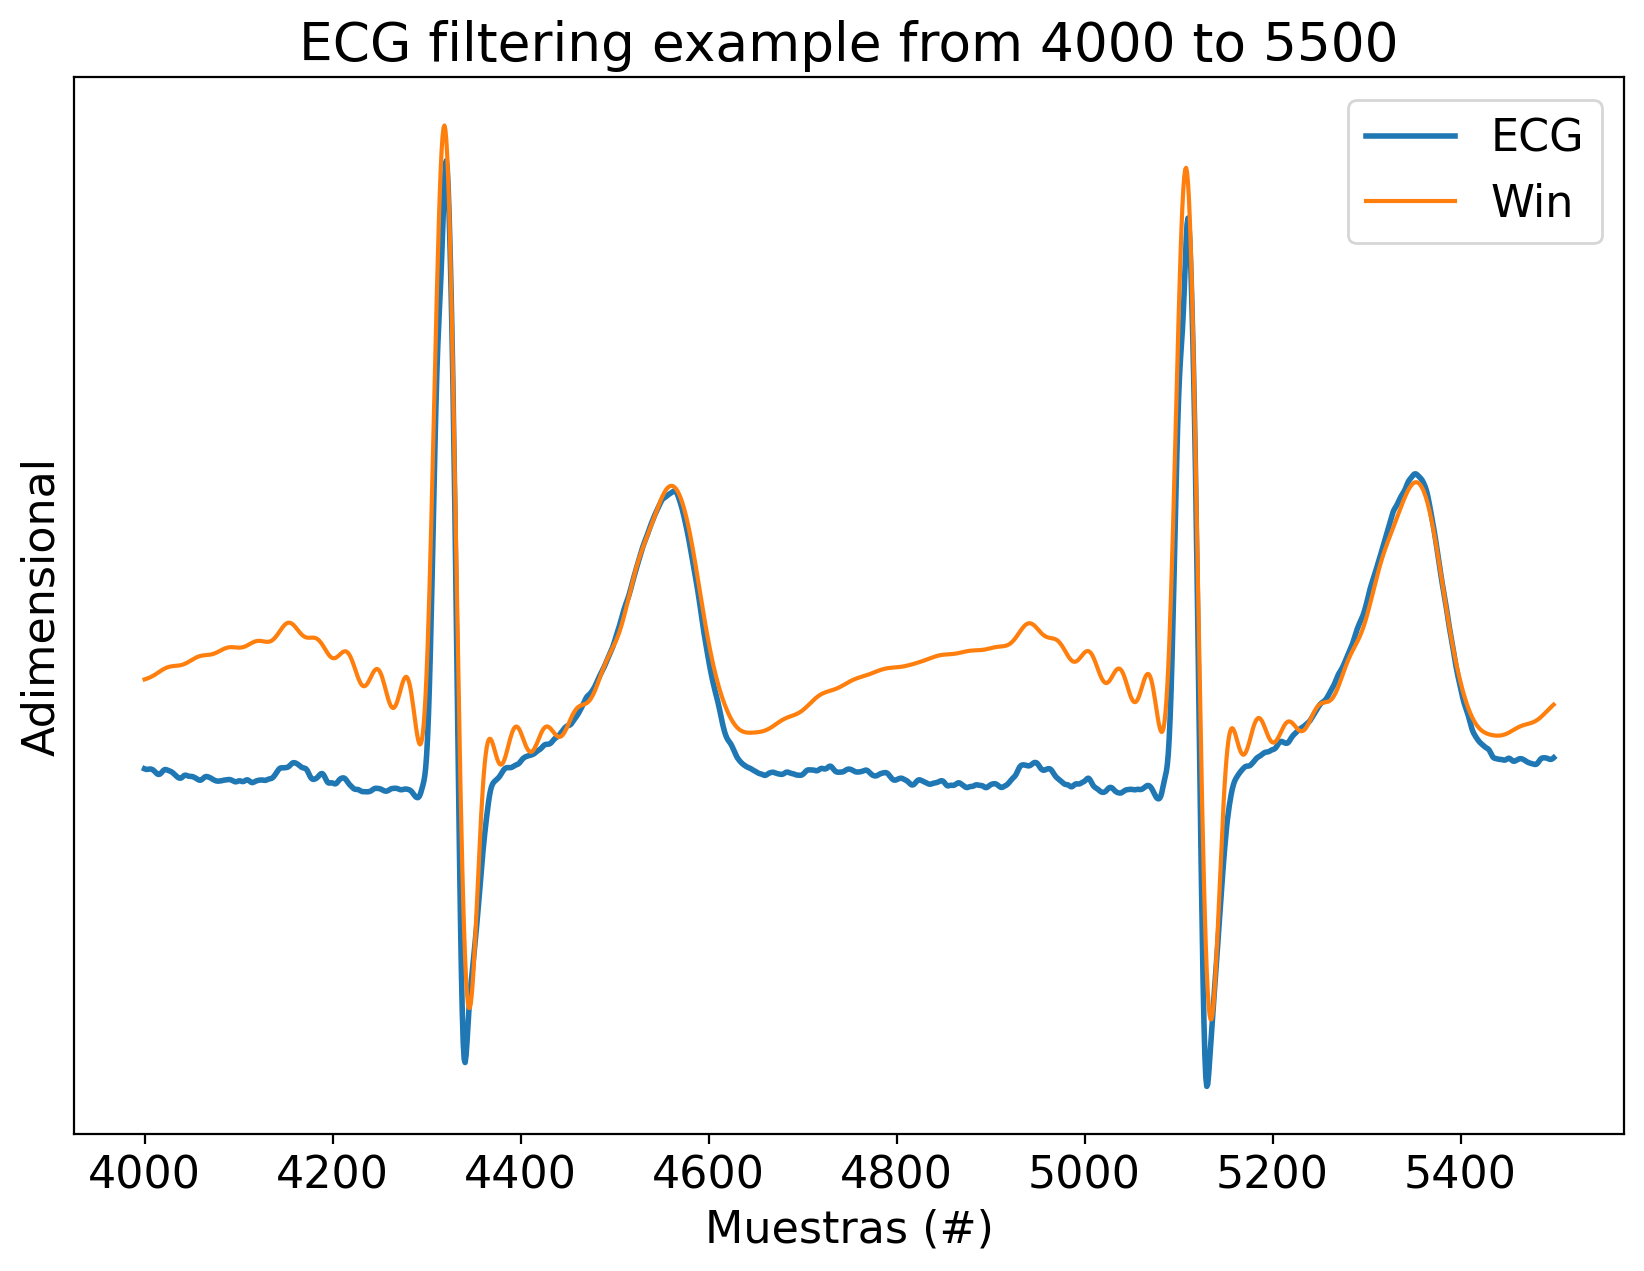

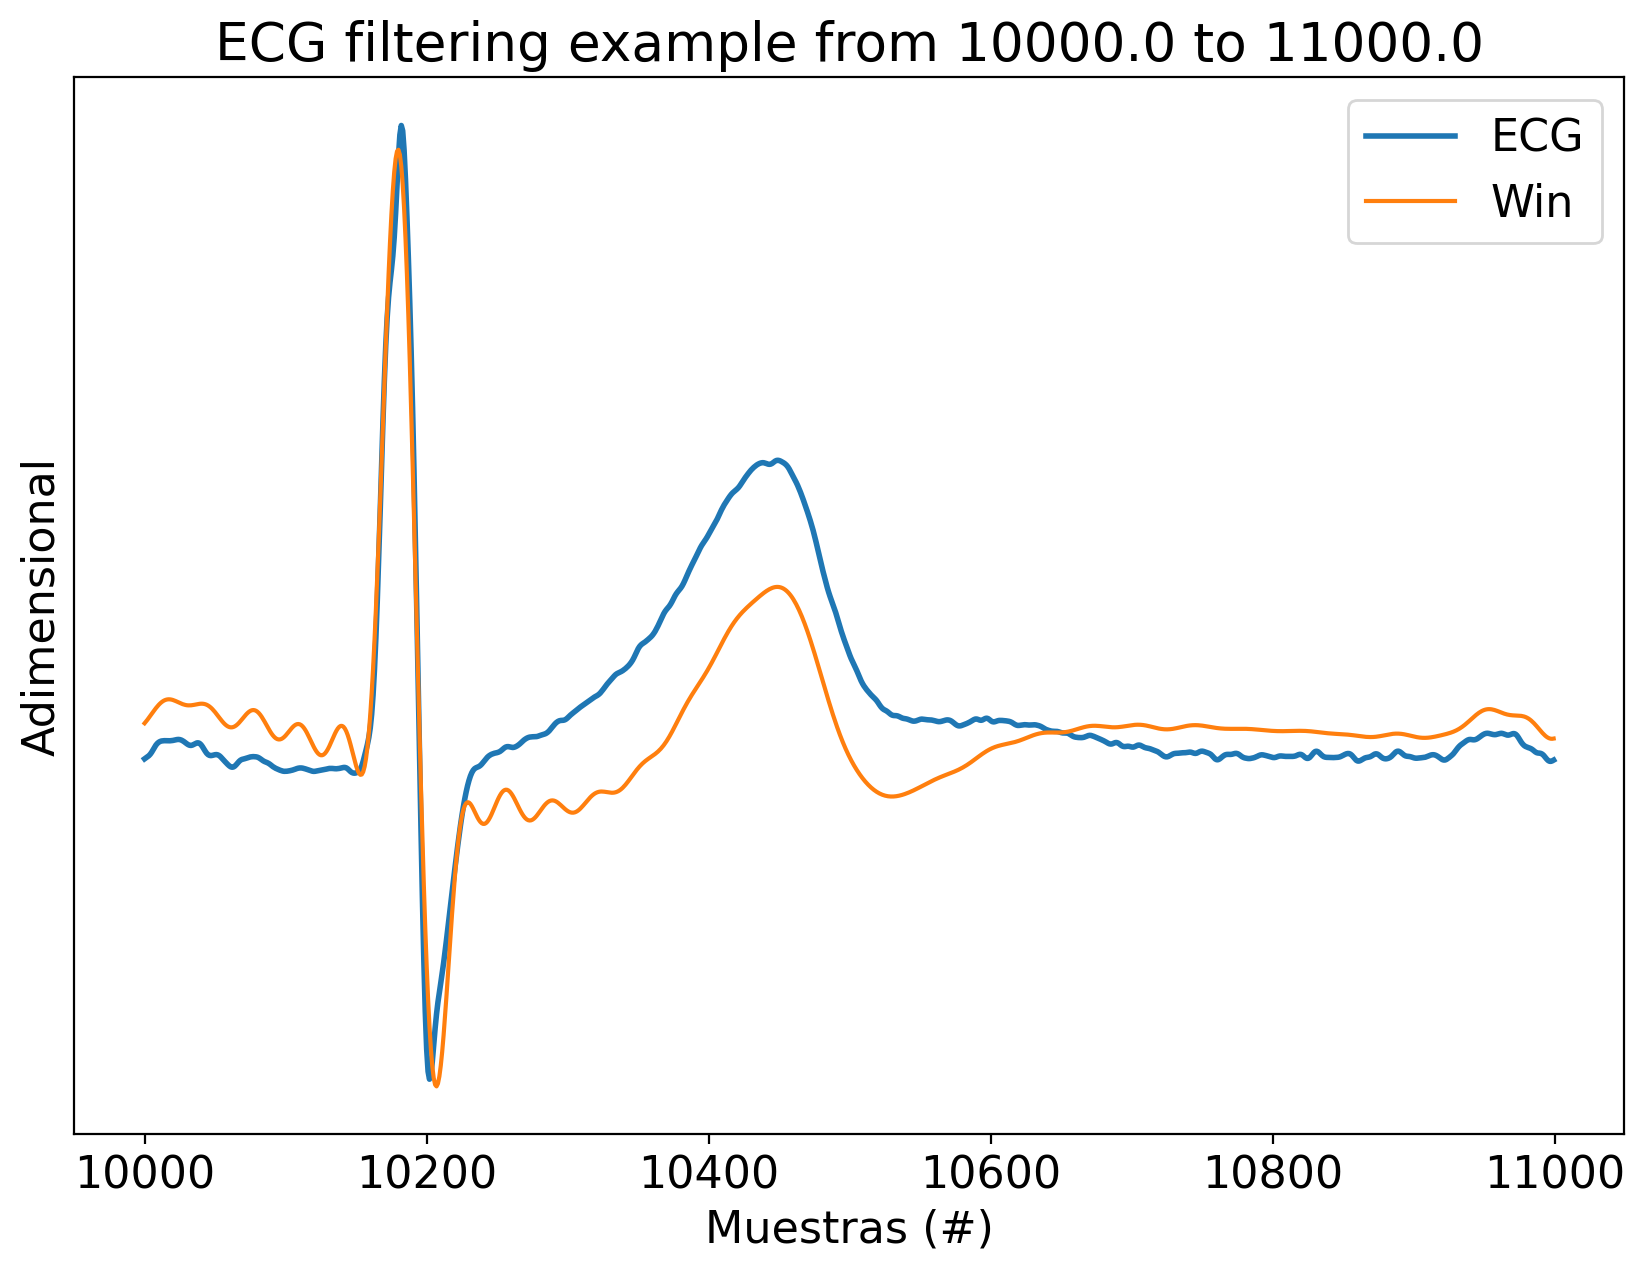

In [28]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_cheb[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()